In [38]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

In [39]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.shape
test_data.shape

(418, 11)

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Visualising**  *the data through some techniques*

Text(0.5, 1.0, 'Survivors = 1 and Dead = 0')

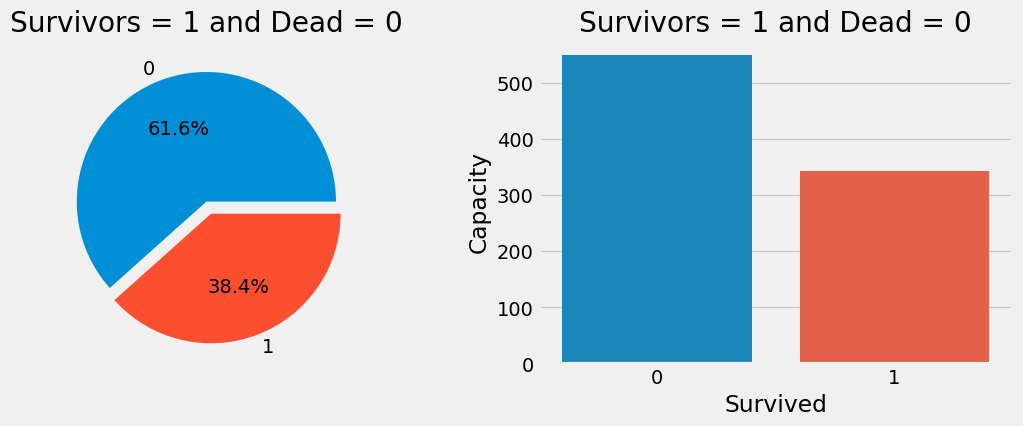

In [42]:
figure, ax = plt.subplots(1,2,figsize=(12,4))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow =False)
ax[0].set_title('Survivors = 1 and Dead = 0')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data = train_data, ax = ax[1])
ax[1].set_ylabel("Capacity")
ax[1].set_title('Survivors = 1 and Dead = 0')


Text(0.5, 1.0, 'Survived = 1 & Deceased = 0: men & women')

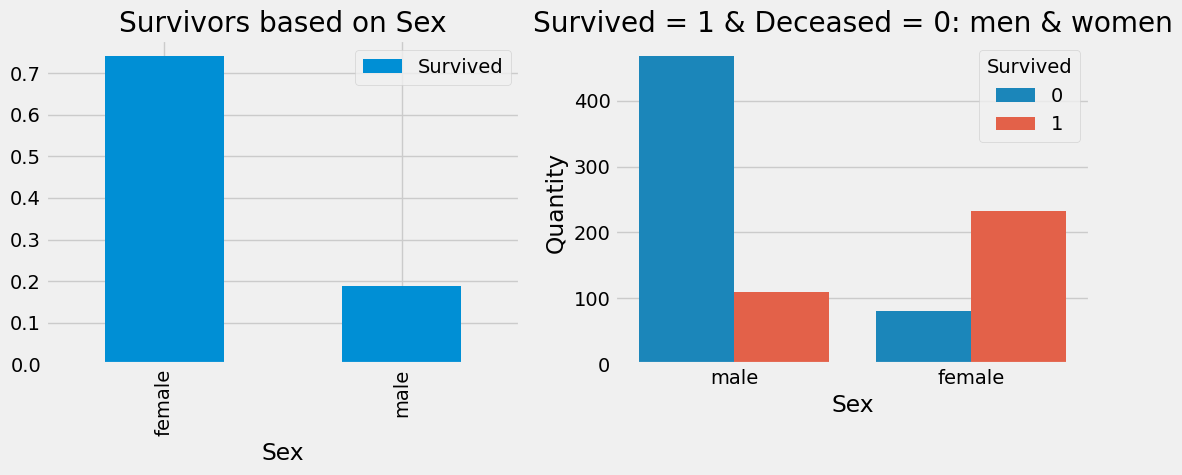

In [43]:
figure, ax = plt.subplots(1,2, figsize = (12,4))
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survivors based on Sex')
sns.countplot(x = "Sex", data = train_data, ax = ax[1], hue = "Survived")
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived = 1 & Deceased = 0: men & women')


*Modifying the model to predict the testing data by droping or modifying of coloumns*

In [44]:
train_data['CabinBool'] = (train_data["Cabin"].notnull().astype('int'))
test_data['CabinBool'] = (train_data["Cabin"].notnull().astype('int'))

train_data = train_data.drop(['Cabin'],axis = 1)
test_data = test_data.drop(['Cabin'],axis = 1 )

In [45]:
train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis = 1)

In [46]:
train_data = train_data.fillna({"Embarked": "A"})


In [47]:
# Sorting based on the ages

train_data['Age'] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)

bin = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels =  ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult','Adult', 'Senior']

train_data['AgeGroup'] = pd.cut(train_data['Age'], bin, labels = labels)
test_data['AgGroup'] = pd.cut(test_data['Age'], bin, labels = labels)

In [48]:
combine_both = [train_data, test_data]

for dataset in combine_both:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

for dataset in combine_both:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Don', 'Major', 'Col', 'Rev', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Sir', 'Mam', 'Lady', 'Countess'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Survived', 'Title']].groupby(['Title'], as_index=False).mean()

title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Rare": 4, "Master": 5, "Rolex": 6, "Royal": 7}

for dataset in combine_both:
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)


In [49]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'CabinBool', 'AgeGroup', 'Title'],
      dtype='object')


In [50]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  CabinBool    891 non-null    int64   
 11  AgeGroup     891 non-null    category
 12  Title        891 non-null    float64 
dtypes: category(1), float64(3), int64(6), object(3)
memory usage: 84.9+ KB
None


In [51]:
age1 = train_data[train_data['Title'] == 1]["AgeGroup"].mode()
age2 = train_data[train_data['Title'] == 2]["AgeGroup"].mode()
age3 = train_data[train_data['Title'] == 3]["AgeGroup"].mode()
age4 = train_data[train_data['Title'] == 4]["AgeGroup"].mode()
age5 = train_data[train_data['Title'] == 5]["AgeGroup"].mode()
age6 = train_data[train_data['Title'] == 6]["AgeGroup"].mode()
age7 = train_data[train_data['Title'] == 7]["AgeGroup"].mode()

age_tat_map = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5:"Teenager",6: "Adult", 7:"Adult"}



for x in range(len(train_data["AgeGroup"])):
    if train_data["AgeGroup"][x] == "Unknown" and train_data["Title"][x] in age_tat_map:
        train_data["AgeGroup"][x] = age_tat_map[train_data["Title"][x]]

for y in range(len(test_data["AgGroup"])):
    if test_data["AgGroup"][y] == "Unknown":
        test_data["AgGroup"][y] = age_tat_map[test_data["Title"][y]]

In [52]:
age_map = {'Baby': 1,'Child': 2, 'Teenager':3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7, 'Super Senior':8}

train_data['AgeGroup'] = train_data['AgeGroup'].map(age_map)
test_data['AgGroup'] = test_data['AgGroup'].map(age_map)

train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,4.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,6.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,5.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,5.0,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,5.0,1.0


In [53]:
# dropping the Name coloumn

train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

train_data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
886,887,0,2,male,27.0,0,0,13.00,S,0,5.0,4.0
887,888,1,1,female,19.0,0,0,30.00,S,1,4.0,2.0
888,889,0,3,female,-0.5,1,2,23.45,S,0,4.0,2.0
889,890,1,1,male,26.0,0,0,30.00,C,1,5.0,1.0
890,891,0,3,male,32.0,0,0,7.75,Q,0,5.0,1.0


In [54]:
# Embarking the mapping

sex_map = {"male":0, "female":1}
train_data['Sex'] = train_data['Sex'].map(sex_map)
test_data['Sex'] = test_data['Sex'].map(sex_map)

em_map = {"A": 1, "C":2, "Q":3}
train_data['Embarked'] = train_data['Embarked'].map(em_map)
test_data['Embarked'] = test_data['Embarked'].map(em_map)

In [55]:
# Replacing the NaN by mean

for i in range(len(test_data["Fare"])):
  if pd.isnull(test_data["Fare"][i]):
    pass_class = test_data["Pclass"][i]
    test_data["Fare"][i] = round(train_data[train_data["Pclass"] == pass_class]["Fare"].mean(),4)

# mapping down the Fare values into the group
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4, labels = [1,2,3,4])
test_data['FareBand'] = pd.qcut(test_data['Fare'], 4, labels = [1,2,3,4])

train_data = train_data.drop(['Fare'], axis = 1)
test_data = test_data.drop(['Fare'], axis = 1)

In [72]:
# Training the model using Random Forest Algo

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

data_train = train_data.drop(["Survived", "PassengerId"], axis = 1)
hit_target = train_data["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(data_train, hit_target, test_size = 0.2, random_state = 0)
imputer = SimpleImputer(strategy = 'mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

algo_classify = RandomForestClassifier()

algo_classify.fit(X_train_imputed,Y_train)
predict = algo_classify.predict(X_test_imputed)

accurac_y = round(accuracy_score(predict, Y_test)*100,2)
print(accurac_y)

84.36


In [87]:
# Predicting the test model

algo_classify = RandomForestClassifier()

algo_classify.fit(X_test_imputed,Y_test)
predict = algo_classify.predict(X_train_imputed)

accurac_y = round(accuracy_score(predict, Y_train)*100,4)
print(accurac_y)

79.073
